# **Date Leakage** #

## **What is data leakage?** ##

Data leakage can be thought of as anytime information from outside your training set enters your model.

# **How to detect and prevent data leakage** ##


## **Are any features surprisingly highly correlated with your target variable?**

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


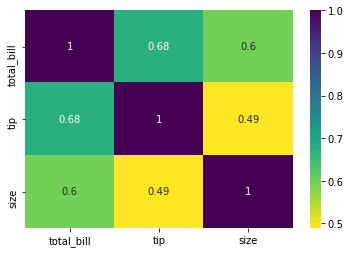

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='viridis_r');

--------

### Similarly, after training your model - review the feature importance to see if anything stands out.

--------

## **If using time series data, train-test split along your date variable.**

Example from machinelearningmastery.com

In [8]:
import pandas as pd

In [11]:
df = pd.read_csv('sunspots.csv', index_col=0)

In [14]:
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


### first ensure sorted by date asc

In [17]:
df.sort_values(by='Date', ascending=True)

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3247,2019-08-31,0.5
3248,2019-09-30,1.1
3249,2019-10-31,0.4
3250,2019-11-30,0.5


### first 75 percent of records in train, remaining in test

In [18]:
train_length = int(len(df)*.75)

train_length

2439

In [19]:
train, test = df[0:train_length], df[train_length: len(df)]

train.shape, test.shape

((2439, 2), (813, 2))

--------

##  **When scaling, fit your scaler to your training group only, then transform both training and test group.**

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

------

## when using **K-fold cross validation**, repeat the preprocessing steps within each fold separately to prevent data leakage.
+ use the pipeline to handle preprocessing steps and use it via GridSearchCV, RandomizedSearchCV.
+ https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc
    
![cv_pipeline.png](cv_pipeline.png)

### [INCORRECT WAY] AVOID SCALING and passing those data into CV. 

![avoidthis.png](avoidthis.png)